# 3.2 robot's movement

## 3.2.1 world coordinate

In [2]:
import matplotlib.pyplot as plt

In [3]:
class World:
    def __init__(self):
        self.objects = []
    
    def append(self, obj):
        self.objects.append(obj)
        
    def draw(self):
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111) # create 1x1 subplot in figure, and set ax as the 1st one.
        ax.set_aspect('equal')
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_xlabel('X', fontsize=20)
        ax.set_ylabel('Y', fontsize=20)
        
        for obj in self.objects:
            obj.draw(ax)

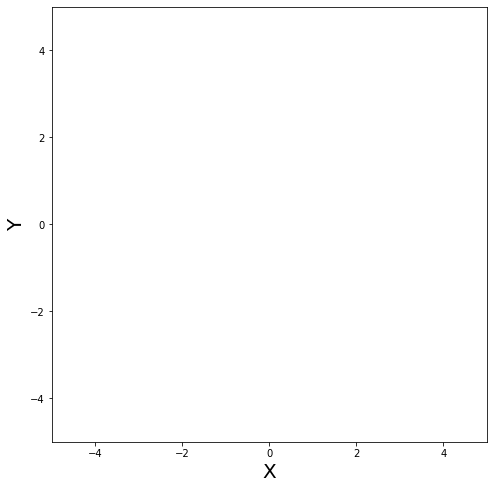

In [4]:
world = World()
world.draw()

## 3.2.2 robot's pose

In [6]:
import math
from matplotlib import patches
import numpy as np

In [7]:
class IdealRobot:
    def __init__(self, pose, color="black"):
        self.pose = pose
        self.r = 0.2 # radius
        self.color = color
        
    def draw(self, ax):
        x,y,theta = self.pose # extract pose
        xn = x + self.r * math.cos(theta) # robot's nose x
        yn = y + self.r * math.sin(theta)
        ax.plot([x,xn],[y,yn], color=self.color) # draw robot's orientation
        c = patches.Circle(xy=(x,y), radius=self.r, fill=False, color=self.color) # draw robot as a circle
        ax.add_patch(c)

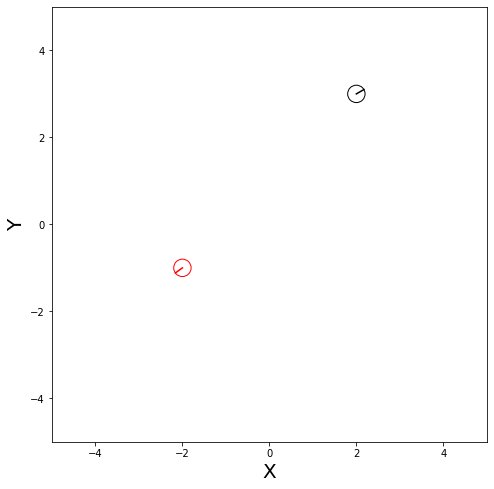

In [13]:
world = World()
robot1 = IdealRobot(np.array([2,3,math.pi/6]))
robot2 = IdealRobot(np.array([-2,-1,math.pi/5*6]), "red")
world.append(robot1)
world.append(robot2)
world.draw()

## 3.2.3 animation

In [32]:
%matplotlib nbagg 
import matplotlib.animation as anm

In [41]:
class World:
    def __init__(self, debug=False):
        self.objects = []
        self.debug = debug
    
    def append(self, obj):
        self.objects.append(obj)
        
    def draw(self):
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111) # create 1x1 subplot in figure, and set ax as the 1st one.
        ax.set_aspect('equal')
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_xlabel('X', fontsize=20)
        ax.set_ylabel('Y', fontsize=20)
        
        elems = []
        
        if self.debug:
            for i in range(1000):
                self.one_step(i, elems, ax) # do not animate when debugging
            else:
                self.ani = anm.FuncAnimation(fig, self.one_step, fargs=(elems,ax), frames=10, interval=1000, repeat=False)
                plt.show()
                
    def one_step(self, i, elems, ax):
        while elems:
            elems.pop().remove()
        elems.append(-4.4, 4.5, "t = "+str(i), fontsize=10) # draw time
        for obj in self.objects:
            obj.draw(ax, elems)

<IPython.core.display.Javascript object>


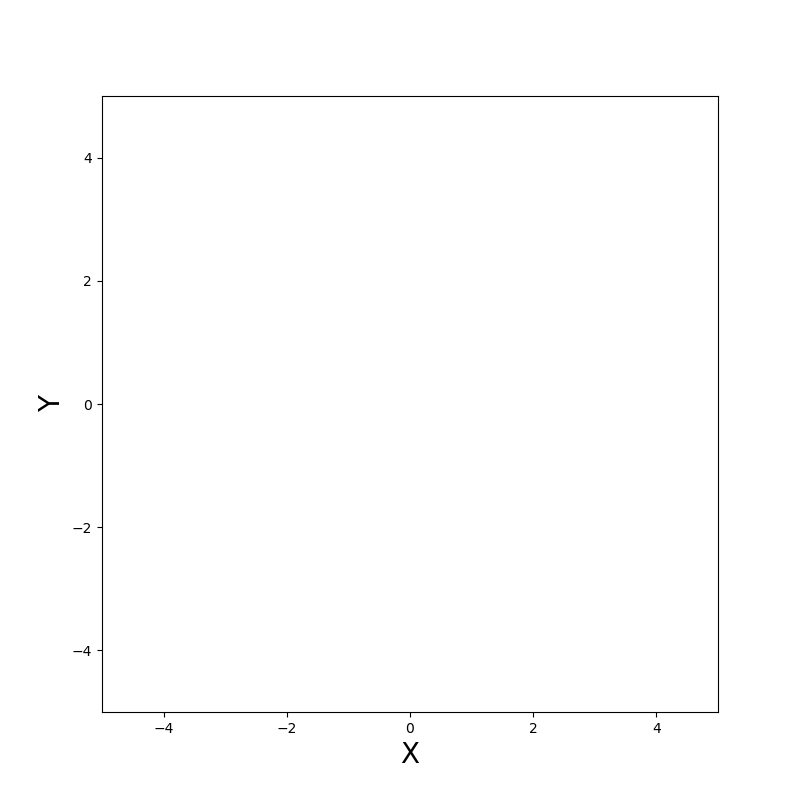

In [42]:
world = World()
robot1 = IdealRobot(np.array([2,3,math.pi/6]))
robot2 = IdealRobot(np.array([-2,-1,math.pi/5*6]), "red")
world.append(robot1)
world.append(robot2)
world.draw()